# Import libraries

In [1]:
!pip install snntorch

In [2]:
import snntorch as snn
from snntorch import spikeplot as splt
from snntorch import spikegen

import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
import snn_neuron_wrapper as snn_npu

### Plotting libraries

In [33]:
#@title Plotting Settings
def plot_mem(mem, title=False):
  if title:
    plt.title(title)
  plt.plot(mem)
  plt.xlabel("Time step")
  plt.ylabel("Membrane Potential")
  plt.xlim([0, 50])
  plt.ylim([0, 1])
  plt.show()

def plot_input_output_spikes(spk_in, spk_out, title=None):
    # Generate Plots
    fig, ax = plt.subplots(2, figsize=(8,4), sharex=True,
                           gridspec_kw = {'height_ratios': [0.4, 0.4]})

    # Plot input spikes
    splt.raster(spk_in, ax[0], s=400, c="black", marker="|")
    ax[0].set_ylabel("Input Spikes")
    ax[0].set_yticks([])
    if title:
        ax[0].set_title(title)

    # Plot output spikes
    splt.raster(spk_out, ax[1], s=400, c="black", marker="|")
    ax[1].set_ylabel("Output Spikes")
    ax[1].set_yticks([])
    ax[1].set_xlabel("Time step")

    plt.show()


def plot_step_current_response(cur_in, mem_rec, vline1):
  fig, ax = plt.subplots(2, figsize=(8,6),sharex=True)

  # Plot input current
  ax[0].plot(cur_in, c="tab:orange")
  ax[0].set_ylim([0, 0.2])
  ax[0].set_ylabel("Input Current ($I_{in}$)")
  ax[0].set_title("Lapicque's Neuron Model With Step Input")

  # Plot membrane potential
  ax[1].plot(mem_rec)
  ax[1].set_ylim([0, 0.6])
  ax[1].set_ylabel("Membrane Potential ($U_{mem}$)")

  if vline1:
    ax[1].axvline(x=vline1, ymin=0, ymax=2.2, alpha = 0.25, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False)
  plt.xlabel("Time step")

  plt.show()


def plot_current_pulse_response(cur_in, mem_rec, title, vline1=False, vline2=False, ylim_max1=False):

  fig, ax = plt.subplots(2, figsize=(8,6),sharex=True)

  # Plot input current
  ax[0].plot(cur_in, c="tab:orange")
  if not ylim_max1:
    ax[0].set_ylim([0, 0.2])
  else:
    ax[0].set_ylim([0, ylim_max1])
  ax[0].set_ylabel("Input Current ($I_{in}$)")
  ax[0].set_title(title)

  # Plot membrane potential
  ax[1].plot(mem_rec)
  ax[1].set_ylim([0, 1])
  ax[1].set_ylabel("Membrane Potential ($U_{mem}$)")

  if vline1:
    ax[1].axvline(x=vline1, ymin=0, ymax=2.2, alpha = 0.25, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False)
  if vline2:
    ax[1].axvline(x=vline2, ymin=0, ymax=2.2, alpha = 0.25, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False)
  plt.xlabel("Time step")

  plt.show()

def compare_plots(cur1, cur2, cur3, mem1, mem2, mem3, vline1, vline2, vline3, vline4, title):
  # Generate Plots
  fig, ax = plt.subplots(2, figsize=(8,6),sharex=True)

  # Plot input current
  ax[0].plot(cur1)
  ax[0].plot(cur2)
  ax[0].plot(cur3)
  ax[0].set_ylim([0, 0.2])
  ax[0].set_ylabel("Input Current ($I_{in}$)")
  ax[0].set_title(title)

  # Plot membrane potential
  ax[1].plot(mem1)
  ax[1].plot(mem2)
  ax[1].plot(mem3)
  ax[1].set_ylim([0, 1])
  ax[1].set_ylabel("Membrane Potential ($U_{mem}$)")

  ax[1].axvline(x=vline1, ymin=0, ymax=2.2, alpha = 0.25, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False)
  ax[1].axvline(x=vline2, ymin=0, ymax=2.2, alpha = 0.25, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False)
  ax[1].axvline(x=vline3, ymin=0, ymax=2.2, alpha = 0.25, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False)
  ax[1].axvline(x=vline4, ymin=0, ymax=2.2, alpha = 0.25, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False)

  plt.xlabel("Time step")

  plt.show()

def plot_cur_mem_spk(cur, mem, spk, thr_line=False, vline=False, title=False, ylim_max2=1.25):
  # Generate Plots
  fig, ax = plt.subplots(3, figsize=(8,6), sharex=True,
                        gridspec_kw = {'height_ratios': [1, 1, 0.4]})

  # Plot input current
  ax[0].plot(cur, c="tab:orange")
  ax[0].set_ylim([0, 0.4])
  ax[0].set_xlim([0, 200])
  ax[0].set_ylabel("Input Current ($I_{in}$)")
  if title:
    ax[0].set_title(title)

  # Plot membrane potential
  ax[1].plot(mem)
  ax[1].set_ylim([0, ylim_max2])
  ax[1].set_ylabel("Membrane Potential ($U_{mem}$)")
  if thr_line:
    ax[1].axhline(y=thr_line, alpha=0.25, linestyle="dashed", c="black", linewidth=2)
  plt.xlabel("Time step")

  # Plot output spike using spikeplot
  splt.raster(spk, ax[2], s=400, c="black", marker="|")
  if vline:
    ax[2].axvline(x=vline, ymin=0, ymax=6.75, alpha = 0.15, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False)
  plt.ylabel("Output spikes")
  plt.yticks([])

  plt.show()

def plot_spk_mem_spk(spk_in, mem, spk_rec, title):
  # Generate Plots
  fig, ax = plt.subplots(3, figsize=(8,6), sharex=True,
                        gridspec_kw = {'height_ratios': [0.4, 1, 0.4]})

  # Plot input current
  splt.raster(spk_in, ax[0], s=400, c="black", marker="|")
  ax[0].set_ylabel("Input Spikes")
  ax[0].set_title(title)
  plt.yticks([])

  # Plot membrane potential
  ax[1].plot(mem)
  ax[1].set_ylim([0, 1])
  ax[1].set_ylabel("Membrane Potential ($U_{mem}$)")
  ax[1].axhline(y=0.5, alpha=0.25, linestyle="dashed", c="black", linewidth=2)
  plt.xlabel("Time step")

  # Plot output spike using spikeplot
  splt.raster(spk_rec, ax[2], s=400, c="black", marker="|")
  plt.ylabel("Output spikes")
  plt.yticks([])

  plt.show()


def plot_reset_comparison(spk_in, mem_rec, spk_rec, mem_rec0, spk_rec0):
  # Generate Plots to Compare Reset Mechanisms
  fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,6), sharex=True,
                        gridspec_kw = {'height_ratios': [0.4, 1, 0.4], 'wspace':0.05})

  # Reset by Subtraction: input spikes
  splt.raster(spk_in, ax[0][0], s=400, c="black", marker="|")
  ax[0][0].set_ylabel("Input Spikes")
  ax[0][0].set_title("Reset by Subtraction")
  ax[0][0].set_yticks([])

  # Reset by Subtraction: membrane potential
  ax[1][0].plot(mem_rec)
  ax[1][0].set_ylim([0, 0.7])
  ax[1][0].set_ylabel("Membrane Potential ($U_{mem}$)")
  ax[1][0].axhline(y=0.5, alpha=0.25, linestyle="dashed", c="black", linewidth=2)

  # Reset by Subtraction: output spikes
  splt.raster(spk_rec, ax[2][0], s=400, c="black", marker="|")
  ax[2][0].set_yticks([])
  ax[2][0].set_xlabel("Time step")
  ax[2][0].set_ylabel("Output Spikes")

  # Reset to Zero: input spikes
  splt.raster(spk_in, ax[0][1], s=400, c="black", marker="|")
  ax[0][1].set_title("Reset to Zero")
  ax[0][1].set_yticks([])

  # Reset to Zero: membrane potential
  ax[1][1].plot(mem_rec0)
  ax[1][1].set_ylim([0, 0.7])
  ax[1][1].axhline(y=0.5, alpha=0.25, linestyle="dashed", c="black", linewidth=2)
  ax[1][1].set_yticks([])
  ax[2][1].set_xlabel("Time step")

  # Reset to Zero: output spikes
  splt.raster(spk_rec0, ax[2][1], s=400, c="black", marker="|")
  ax[2][1].set_yticks([])

  plt.show()

def plot_snn_spikes(spk_in, spk1_rec, spk2_rec, num_outputs, title):
  # Generate Plots
  fig, ax = plt.subplots(3, figsize=(8,7), sharex=True,
                        gridspec_kw = {'height_ratios': [1, 1, 0.4]})

  # Plot input spikes
  splt.raster(spk_in[:,0], ax[0], s=0.03, c="black")
  ax[0].set_ylabel("Input Spikes")
  ax[0].set_title(title)

  # Plot hidden layer spikes
  splt.raster(spk1_rec.reshape(num_steps, -1), ax[1], s = 0.05, c="black")
  ax[1].set_ylabel("Hidden Layer")

  # Plot output spikes
  splt.raster(spk2_rec.reshape(num_steps, -1), ax[2], c="black", marker="|")
  ax[2].set_ylabel("Output Spikes")
  ax[2].set_ylim([0, num_outputs])

  plt.show()

def plot_metrics(all_metrics):
    # Extract data
    designs = [m['design'] for m in metrics]
    throughputs = [m['throughput'] for m in metrics]
    npu_times = [m['npu_time'] for m in metrics]

    # Color coding based on vectorized/scalar
    colors = []
    for d in designs:
        if 'vectorized' in d:
            colors.append('green')
        elif 'scalar' in d:
            colors.append('orange')
        else:
            colors.append('gray')  # snntorch or others
    
    # Plot 1: Throughput
    plt.figure(figsize=(10, 5))
    plt.bar(designs, throughputs, color=colors)
    plt.ylabel('Throughput (spikes/sec)')
    plt.title('Throughput by Design')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # Plot 2: NPU Time
    plt.figure(figsize=(10, 5))
    plt.bar(designs, npu_times, color=colors)
    plt.ylabel('NPU Time (µs)')
    plt.title('Response Time (µs) by Design')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# SNN models

## Custom Library NPU

### SNN NPU neuron core - vectorized - scalar

In [8]:
metrics = []

for in_size in [4096]:
    input_data = torch.ones(1024, dtype=torch.int32)
    neuron = snn_npu.snn_neuron_npu_singlecore(in1_size = in_size, out_size = in_size, threshold = 5, vectorized = True)
    neuron.to("npu")
    output_data, metrics_loop = neuron(input_data)
    metrics.append(metrics_loop)


Compilation completed. Artifacts generated: build/final.xclbin, build/insts.bin
Model Running on NPU...
Running the testbench...
Extracted NPU response time: 506.0 us
Extracted Throughput: 2027720.0 operations/second
Test status: FAIL
CMake Deprecation Warning at CMakeLists.txt:14 (cmake_minimum_required):
  Compatibility with CMake < 3.10 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value.  Or, use the <min>...<max> syntax
  to tell CMake that the project requires at least <min> but has been updated
  to work with policies introduced by <max> or earlier.


CMake Warning (dev) at CMakeLists.txt:45 (find_package):
  Policy CMP0167 is not set: The FindBoost module is removed.  Run "cmake
  --help-policy CMP0167" for policy details.  Use the cmake_policy command to
  set the policy and suppress this warning.

This warning is for project developers.  Use -Wno-dev to suppress it.




In [5]:
metrics = []

for in_size in [4096]:
    input_data = torch.ones(1024, dtype=torch.int32)
    neuron = snn_npu.snn_neuron_npu_singlecore(in1_size = in_size, out_size = in_size, threshold = 5, vectorized = False)
    neuron.to("npu")
    output_data, metrics_loop = neuron(input_data)
    metrics.append(metrics_loop)


Compilation completed. Artifacts generated: build/final.xclbin, build/insts.bin
Model Running on NPU...
Running the testbench...
Extracted NPU response time: 1107.0 us
Extracted Throughput: 925859.0 operations/second
Test status: PASS
CMake Deprecation Warning at CMakeLists.txt:14 (cmake_minimum_required):
  Compatibility with CMake < 3.10 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value.  Or, use the <min>...<max> syntax
  to tell CMake that the project requires at least <min> but has been updated
  to work with policies introduced by <max> or earlier.


CMake Warning (dev) at CMakeLists.txt:45 (find_package):
  Policy CMP0167 is not set: The FindBoost module is removed.  Run "cmake
  --help-policy CMP0167" for policy details.  Use the cmake_policy command to
  set the policy and suppress this warning.

This warning is for project developers.  Use -Wno-dev to suppress it.




In [6]:
print(metrics)

[{'design': 'singlecore_scalar', 'npu_time': 1107.0, 'throughput': 925859.0, 'test_status': 'PASS'}]


### SNN NPU multicore - vectorized - scalar

In [39]:
for in_size in [4096]:
    input_data = torch.ones(1024, dtype=torch.int32)
    neuron = snn_npu.snn_neuron_npu_multicore(in1_size = in_size, out_size = in_size, threshold = 5, vectorized = False)
    neuron.to("npu")
    output_data, metrics_loop = neuron(input_data)
    metrics.append(metrics_loop)



Compilation completed. Artifacts generated: build/final.xclbin, build/insts.bin
Model Running on NPU...
Running the testbench...
Extracted NPU response time: 652.0 us
Extracted Throughput: 1572960.0 operations/second
Test status: PASS
CMake Deprecation Warning at CMakeLists.txt:14 (cmake_minimum_required):
  Compatibility with CMake < 3.10 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value.  Or, use the <min>...<max> syntax
  to tell CMake that the project requires at least <min> but has been updated
  to work with policies introduced by <max> or earlier.


CMake Warning (dev) at CMakeLists.txt:45 (find_package):
  Policy CMP0167 is not set: The FindBoost module is removed.  Run "cmake
  --help-policy CMP0167" for policy details.  Use the cmake_policy command to
  set the policy and suppress this warning.

This warning is for project developers.  Use -Wno-dev to suppress it.




In [40]:
metrics = []
for in_size in [4096]:
    input_data = torch.ones(1024, dtype=torch.int32)
    neuron = snn_npu.snn_neuron_npu_multicore(in1_size = in_size, out_size = in_size, threshold = 5, vectorized = True)
    neuron.to("npu")
    output_data, metrics_loop = neuron(input_data)
    metrics.append(metrics_loop)


Compilation completed. Artifacts generated: build/final.xclbin, build/insts.bin
Model Running on NPU...
Running the testbench...
Extracted NPU response time: 652.0 us
Extracted Throughput: 1572960.0 operations/second
Test status: PASS
CMake Deprecation Warning at CMakeLists.txt:14 (cmake_minimum_required):
  Compatibility with CMake < 3.10 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value.  Or, use the <min>...<max> syntax
  to tell CMake that the project requires at least <min> but has been updated
  to work with policies introduced by <max> or earlier.


CMake Warning (dev) at CMakeLists.txt:45 (find_package):
  Policy CMP0167 is not set: The FindBoost module is removed.  Run "cmake
  --help-policy CMP0167" for policy details.  Use the cmake_policy command to
  set the policy and suppress this warning.

This warning is for project developers.  Use -Wno-dev to suppress it.




In [7]:
print(metrics)

[{'design': 'multicore_vectorized', 'npu_time': 642.0, 'throughput': 1597500.0, 'test_status': 'PASS'}]


## SNNTorch

### Single Leaky neuron

Simulation took 115641.59 microseconds
Metrics: [{'design': 'snntorch', 'npu_time': 115641.59, 'throughput': 1201.99, 'test_status': 'PASS'}]
139.0


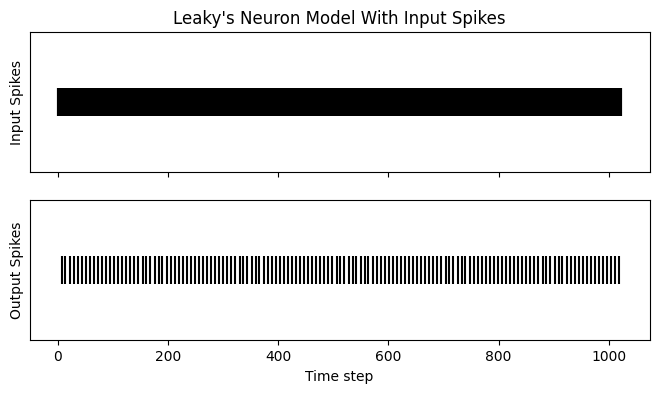

In [45]:
import torch
import time
import snntorch as snn
from snntorch import spikegen

# Set the random seed for reproducibility
torch.manual_seed(123)

# Define number of simulation steps
num_steps = 1024

# Create a 1-D random spike train (40% chance of spike at each step)
spk_in = spikegen.rate_conv(torch.ones((num_steps, 1)) * 1)

# Instantiate a Leaky Integrate-and-Fire neuron
lif = snn.Leaky(beta=0.9, threshold=5)
torch.set_num_threads(1)
# Initialize membrane potential and spike output
mem = torch.zeros(1)
spk_out = torch.zeros(1)
mem_rec = [mem]
spk_rec = [spk_out]

# Measure simulation time
start_time = time.time()
for step in range(num_steps):
    spk_out, mem = lif(spk_in[step], mem)
    mem_rec.append(mem)
    spk_rec.append(spk_out)
end_time = time.time()

# Convert recorded data to tensors
mem_rec = torch.stack(mem_rec)
spk_rec = torch.stack(spk_rec)

# Calculate metrics
total_spikes = spk_rec.sum().item()
simulation_time_us = (end_time - start_time) * 1e6  # in microseconds
throughput = total_spikes * 1e6 / simulation_time_us   # spikes per second

# Create metrics dictionary
metrics = [{
    'design': 'snntorch',
    'npu_time': round(simulation_time_us, 2),       # response time in µs
    'throughput': round(throughput, 2),              # spikes/sec
    'test_status': 'PASS'
}]

# Print results
print(f"Simulation took {metrics[0]['npu_time']} microseconds")
print(f"Metrics: {metrics}")
print(total_spikes)
#plot_spk_mem_spk(spk_in, mem_rec, spk_rec, title = "Leaky's Neuron Model With Input Spikes")
plot_input_output_spikes(spk_in, spk_rec, title = "Leaky's Neuron Model With Input Spikes")

In [43]:
import torch
import torch.nn as nn
import snntorch as snn
from snntorch import spikegen
import time

# Define the SNN
class SNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 16)
        self.lif1 = snn.Leaky(beta=0.9)
        self.fc2 = nn.Linear(16, 4)
        self.lif2 = snn.Leaky(beta=0.9)

    def forward(self, x, num_steps=128):
        mem1 = self.lif1.init_leaky()
        mem2 = self.lif2.init_leaky()
        spk_out_rec = []

        for step in range(num_steps):
            cur1 = self.fc1(x)
            spk1, mem1 = self.lif1(cur1, mem1)

            cur2 = self.fc2(spk1)
            spk2, mem2 = self.lif2(cur2, mem2)

            spk_out_rec.append(spk2)

        return torch.stack(spk_out_rec)

# Create input
num_steps = 128
x = spikegen.rate_conv(torch.ones((num_steps, 1, 4)) * 0.5)

# Run and time the model
net = SNN()
start = time.time()
out_spikes = net(x[0], num_steps=num_steps)
end = time.time()

# Metrics
duration_us = (end - start) * 1e6
total_spikes = out_spikes.sum().item()
throughput = total_spikes / ((end - start))

# Print results
print({
    'design': 'SNN_4-16-4',
    'npu_time': round(duration_us, 2),
    'throughput': round(throughput, 2),
    'test_status': 'PASS'
})


{'design': 'SNN_4-16-4', 'npu_time': 39191.25, 'throughput': 1275.8, 'test_status': 'PASS'}


## Plot the metrics

In [27]:
import torch.nn as nn

# Define Network
class Net(nn.Module):
    def __init__(self, num_inputs, num_hidden, num_outputs, beta):
        super().__init__()

        # initialize layers
        self.fc1 = nn.Linear(num_inputs, num_hidden)
        # Basically the neuron are acting as activation function for the hidden layer
        self.lif1 = snn.Leaky(beta=beta)
        self.fc2 = nn.Linear(num_hidden, num_outputs)
        self.lif2 = snn.Leaky(beta=beta)

    def forward(self, x, mem1, spk1, mem2):
        cur1 = self.fc1(x)
        spk1, mem1 = self.lif1(cur1, mem1)
        cur2 = self.fc2(spk1)
        spk2, mem2 = self.lif2(cur2, mem2)
        return mem1, spk1, mem2, spk2

In [44]:
spk1_rec = []
spk2_rec = []

num_steps = 200
spk_in = spikegen.rate_conv(torch.rand((200, 16))).unsqueeze(1)
print(f"Dimension of the input: {spk_in}")

Dimension of the input: tensor([[[0., 1., 0.,  ..., 1., 0., 1.]],

        [[0., 1., 1.,  ..., 1., 1., 1.]],

        [[0., 1., 1.,  ..., 1., 0., 0.]],

        ...,

        [[0., 0., 1.,  ..., 1., 1., 1.]],

        [[1., 0., 0.,  ..., 1., 0., 1.]],

        [[1., 0., 0.,  ..., 0., 1., 0.]]])


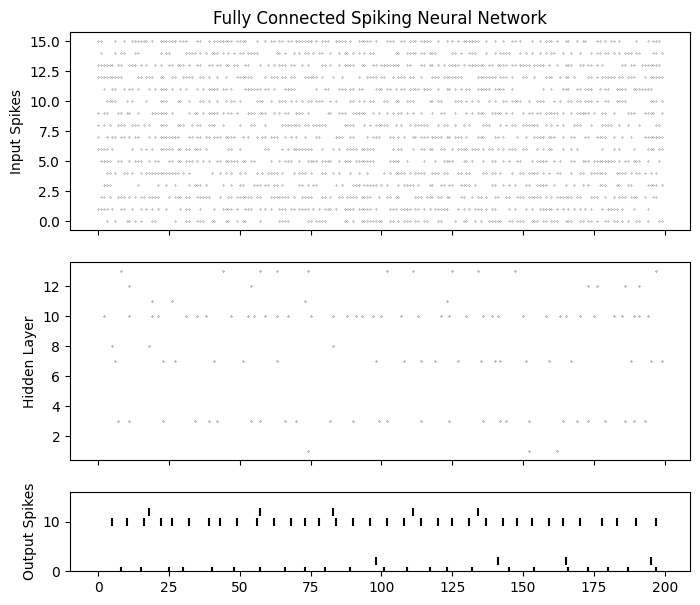

In [45]:
# Build the model
num_inputs = 16
num_hidden = 16
num_outputs = 16
model = Net(num_inputs = num_inputs, num_hidden = num_hidden, num_outputs = num_outputs, beta = 0.9)

# Initialize the membrane
mem1 = torch.zeros_like(torch.tensor(num_hidden))
mem2 = torch.zeros_like(torch.tensor(num_outputs))
spk1 = 0
# Run the model
for step in range (num_steps):
    mem1, spk1, mem2, spk2 = model.forward(spk_in[step], mem1, spk1, mem2)
    spk1_rec.append(spk1)
    spk2_rec.append(spk2)

spk1_rec = torch.stack(spk1_rec)
spk2_rec = torch.stack(spk2_rec)

plot_snn_spikes(spk_in, spk1_rec, spk2_rec, num_outputs, "Fully Connected Spiking Neural Network")

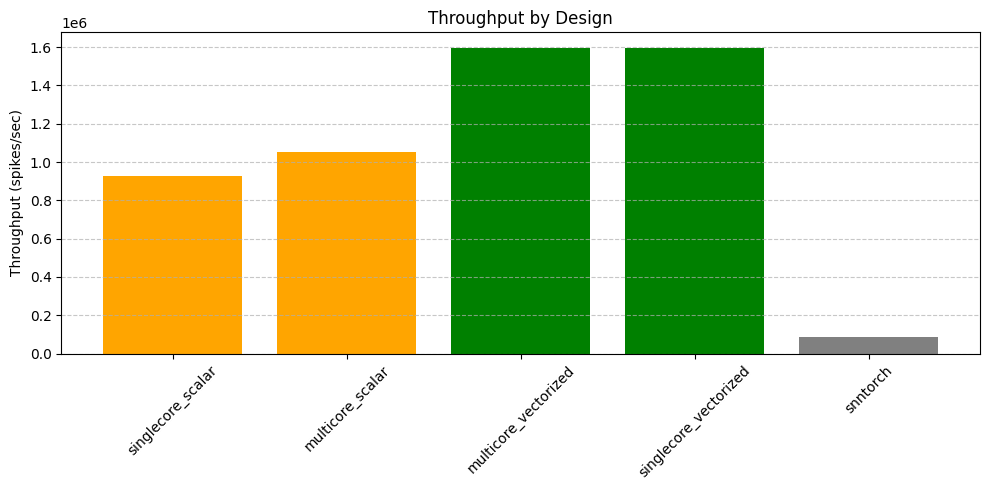

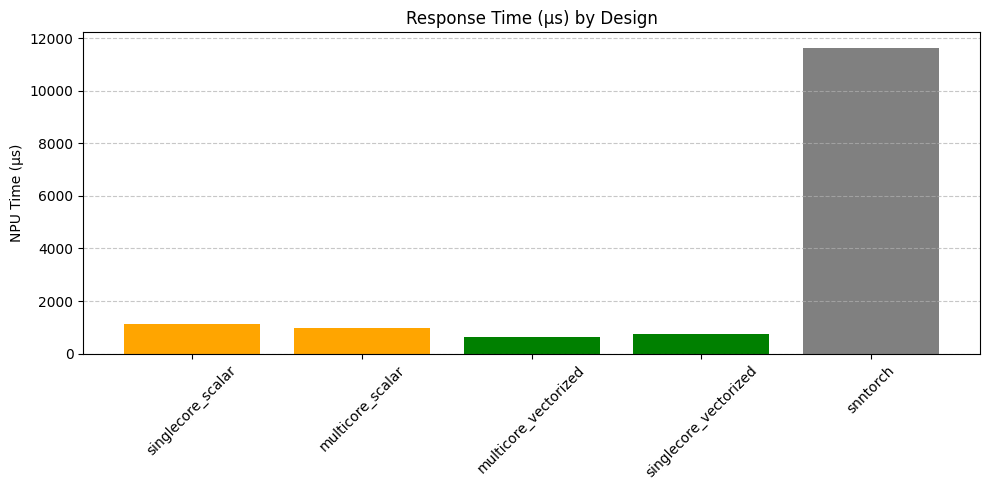

In [37]:
metrics = [{'design': 'singlecore_scalar', 'npu_time': 1107.0, 'throughput': 925859.0, 'test_status': 'PASS'},{'design': 'multicore_scalar', 'npu_time': 974.0, 'throughput': 1053500.0, 'test_status': 'FAIL'}, {'design': 'multicore_vectorized', 'npu_time': 642.0, 'throughput': 1597500.0, 'test_status': 'PASS'}, {'design': 'singlecore_vectorized', 'npu_time': 755.0, 'throughput': 1597500.0, 'test_status': 'PASS'}, {'design': 'snntorch', 'npu_time': 11634.89, 'throughput': 88010.11, 'test_status': 'PASS'}]
plot_metrics(metrics)